IMPORTING DEPENDENCIES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Importing Data


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [5]:
# Shape of array
print(X_train.shape, Y_train.shape , X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# Print 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


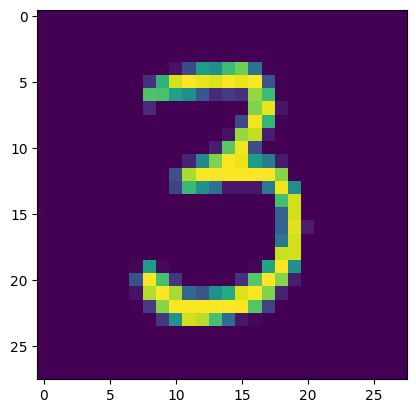

3


In [9]:
# displaying image
plt.imshow(X_train[50])
plt.show()

print(Y_train[50])


Image labels

In [10]:
# unique value in data
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply One Hot Encoding

Since all images size is 28 x 28 , no need of resize of images

In [11]:
# Normalization , scaling the limits between 0 to 1
X_train = X_train / 255
X_test = X_test / 255

BUILDING NEURAL NETWORK

In [12]:
# Setting up layers for neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compiling the NN

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Training the data
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8489 - loss: 0.5196
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9576 - loss: 0.1434
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9686 - loss: 0.1037
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0810
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9798 - loss: 0.0659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9835 - loss: 0.0546
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9860 - loss: 0.0475
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9877 - loss: 0.0403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9890 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0320


Training data accuracy is 98.97%

**Accuracy on test data**

In [18]:
loss , accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1480


In [22]:
# PREDICTION
Y_pred = model.predict(X_test)
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [23]:
print(Y_pred[0])

[8.1900181e-03 3.6935315e-02 4.7334932e-02 2.7601951e-01 3.0683061e-06
 7.3649258e-05 1.9157901e-13 9.9999970e-01 2.9681047e-02 4.5923728e-01]


model.predict() gives the prediction probability of each lass for that data point

In [25]:
# Converting the prediction to class label
label_for_first = np.argmax(Y_pred[0])
print(label_for_first)

7


In [26]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(9), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test = True labels
Y_pred_labels = Predicted labels

COnfusion matrix

In [27]:
conf_mat =confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 940    0    3    2    3    4    3    0    4   21]
 [   0 1120    0    4    1    1    3    2    4    0]
 [   1    4  995    9    3    0    3    9    8    0]
 [   0    0    7  973    0   13    0    6    0   11]
 [   0    0    2    0  965    0    3    2    1    9]
 [   1    1    0   12    3  867    5    0    2    1]
 [   3    2    4    2   11    7  925    0    4    0]
 [   0    3    5    4    2    1    0  994    2   17]
 [   2    1    4   10    7    7    0    3  934    6]
 [   0    5    1    2   14    7    0    2    3  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

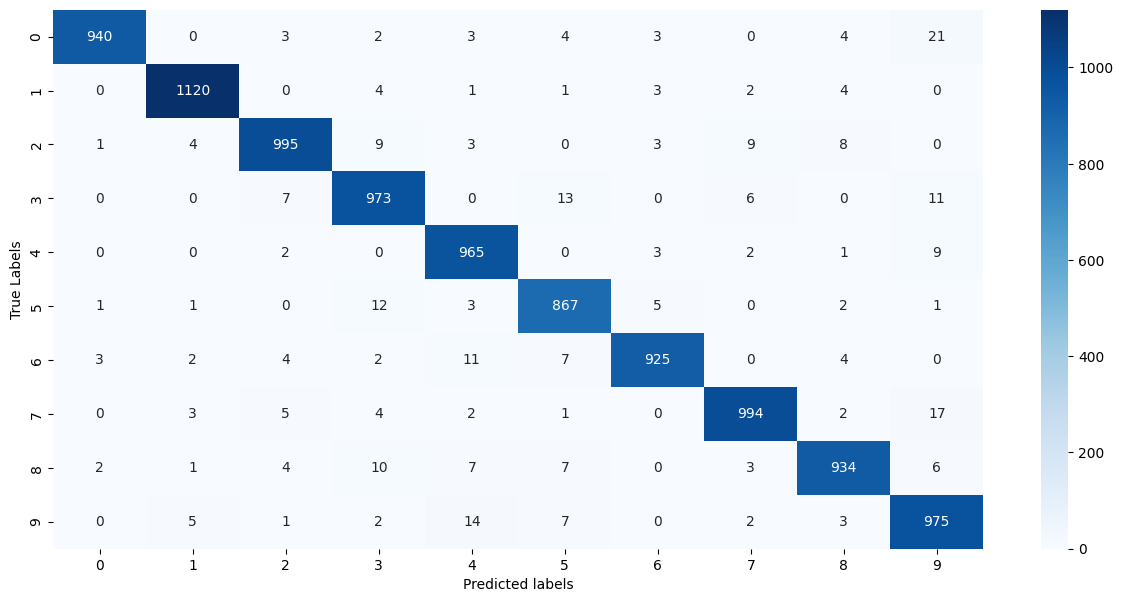

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

**BUILDING PREDICTIVE SYSTEM**

In [32]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
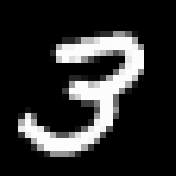

In [34]:
input_image

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


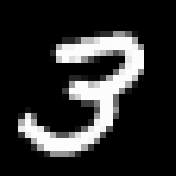

(176, 176, 3)

In [36]:
cv2_imshow(input_image)
input_image.shape

In [37]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(176, 176)

In [39]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [40]:
input_image_resize.shape

(28, 28)

In [42]:
cv2_imshow(input_image_resize)

In [43]:
input_image_resize = input_image_resize / 255

In [44]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [45]:
input_pred = model.predict(image_reshaped)
print(input_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[6.4670913e-10 4.7868880e-06 4.4083549e-06 1.0000000e+00 9.5481489e-08
  2.3305357e-02 7.2308695e-15 2.1968264e-08 2.2872180e-02 9.9816984e-01]]


In [46]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

3


**Predictive system**


Path of image to be predicted: /content/MNIST_digit.png


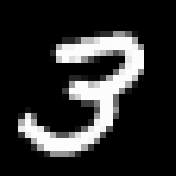

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The handwritten image is recognised as  3


In [49]:
input_image_path = input('Path of image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize / 255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print('The handwritten image is recognised as ', input_pred_label)